In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: xlabel='Height', ylabel='Count'>

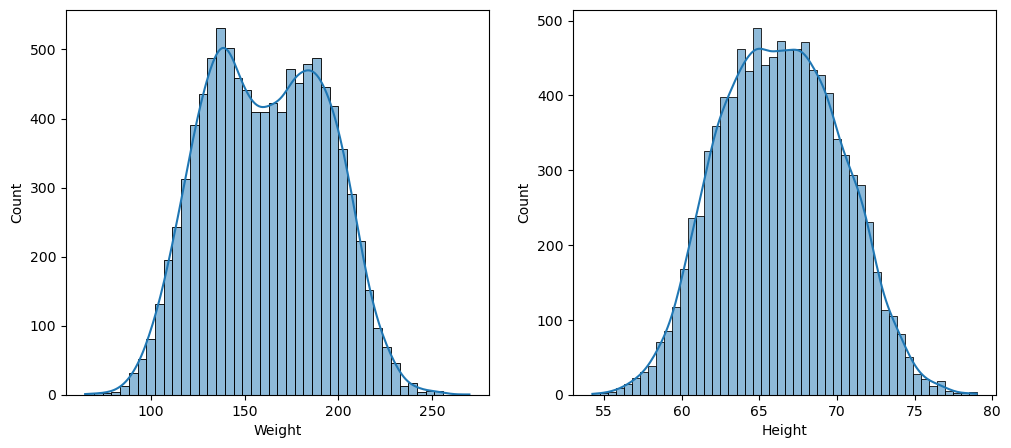

In [6]:
fig = plt.figure(figsize=(12,5))

plt.subplot(121)
sns.histplot(df['Weight'],kde=True)

plt.subplot(122)
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

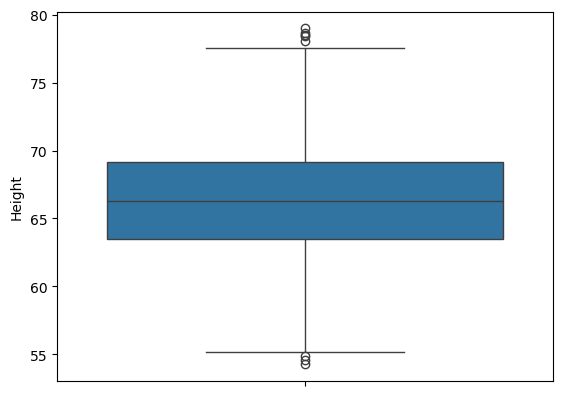

In [7]:
sns.boxplot(df['Height'])

In [10]:
lower_lmt = df['Height'].quantile(0.01)
upper_lmt = df['Height'].quantile(0.99)
lower_lmt,upper_lmt

(58.13441158671655, 74.7857900583366)

In [12]:
# outliers detection
df[(df['Height']<=lower_lmt) | (df['Height']>=upper_lmt)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### Trimming

In [13]:
new_df_trimmed = df[(df['Height']>=lower_lmt) & (df['Height']<=upper_lmt)]

<Axes: ylabel='Height'>

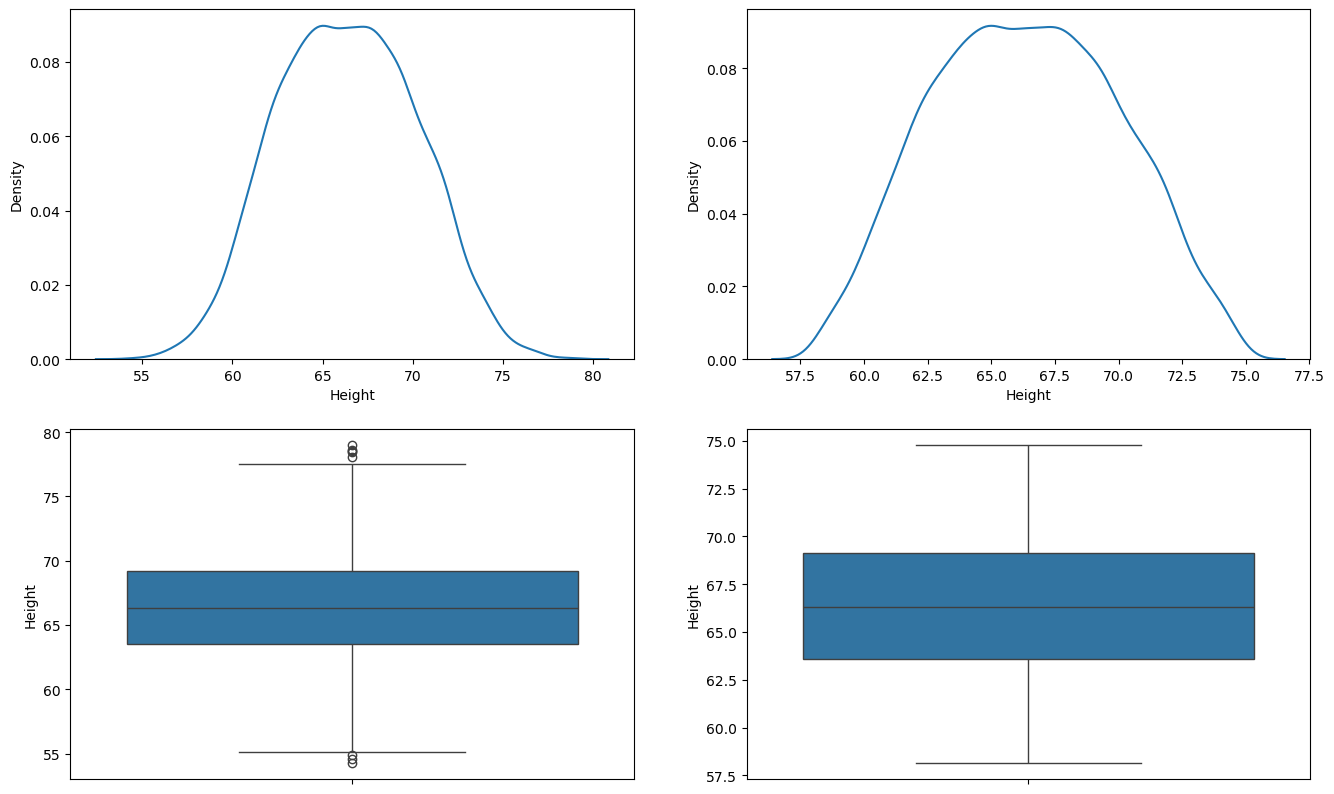

In [23]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.kdeplot(df['Height'])

plt.subplot(2,2,2)
sns.kdeplot(new_df_trimmed['Height'])

plt.subplot(2,2,3)
sns.boxplot(df['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_df_trimmed['Height'])

### capping - winsorization

In [24]:
new_df_capped = df.copy()

In [26]:
new_df_capped['Height'] = np.where(
    new_df_capped['Height']>upper_lmt,
    upper_lmt,
    np.where(
        new_df_capped['Height']<lower_lmt,
        lower_lmt,
        new_df_capped['Height']
    )
)

In [27]:
new_df_capped.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Height'>

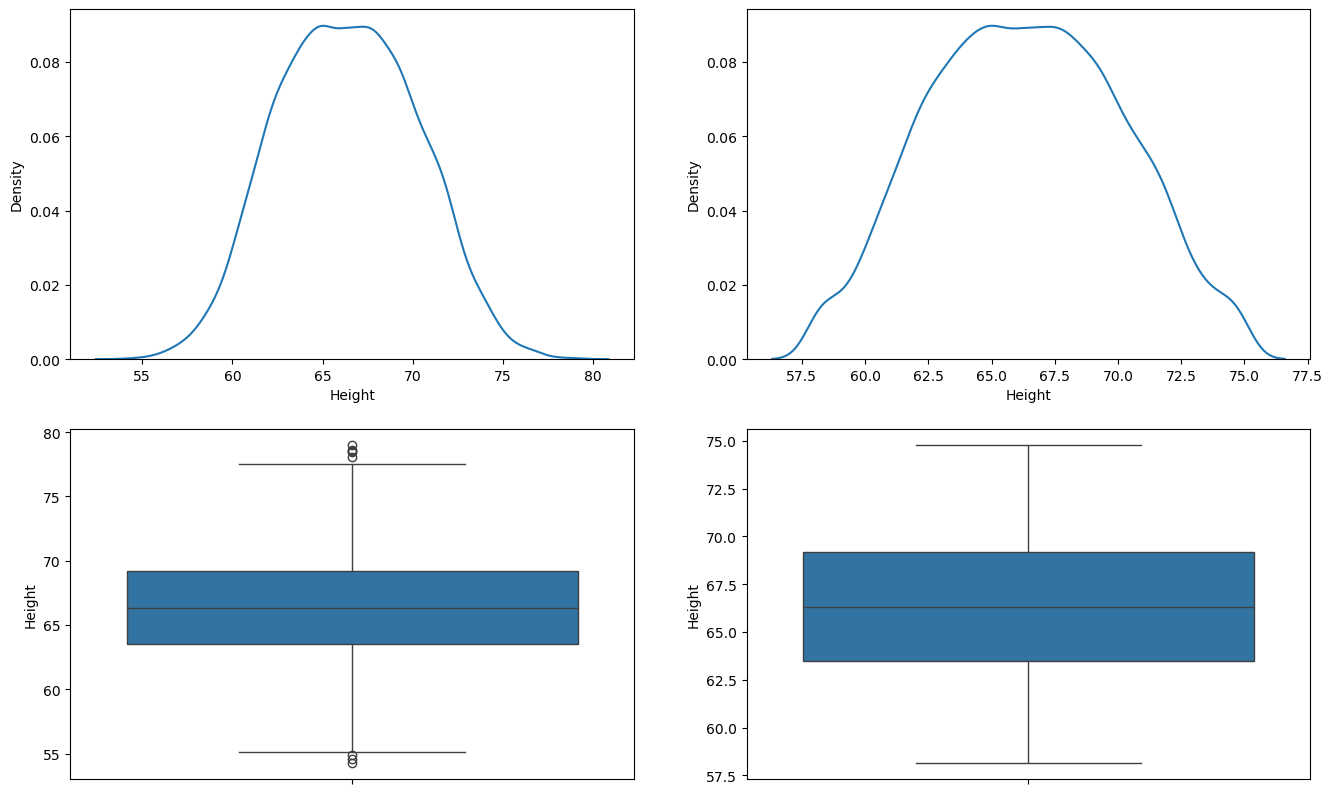

In [28]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.kdeplot(df['Height'])

plt.subplot(2,2,2)
sns.kdeplot(new_df_capped['Height'])

plt.subplot(2,2,3)
sns.boxplot(df['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_df_capped['Height'])